In [1]:
import pandas as pd
import re
import src.clean as cn
import src.json as jn
import numpy as np
pd.set_option("display.max_rows", 250)
pd.set_option("display.max_columns", 30)
import matplotlib.pyplot as plt
import src.Grafico as gr
import seaborn as sns

In [2]:
#Abrimosel archivo para observar los datos que tenemos en el archivo attacks.csv
df_weather=pd.read_csv("input/weather_features.csv",encoding='cp1252')

In [4]:
#limpieza y arreglo del dataset de kaggle
df_weather_CN = df_weather['city_name']
df_indice = cn.indice(df_weather_CN)
df_data = cn.div_in_set(df_weather,df_indice,"madrid")
df_data2 = cn.delete_duplicate(df_data)
df_data_weather = cn.arreglo(df_data2)
df_data_weather = cn.redondear(df_data_weather)
df_data_weather = cn.insert_month_year(df_data_weather)
df_data_weather = cn.temp_C (df_data_weather)

In [5]:
#limpieza y arreglo del dataset de kaggle
df_data_weather.insert(8, "prec", np.nan)
df_data_weather.columns = ['Year', 'Month', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'Precip']

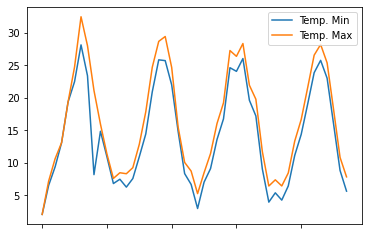

In [6]:
#limpieza y arreglo del dataset de kaggle
df_data_weather["temp_min"].plot(label="Temp. Min", legend=True).set_xticklabels([])
df_data_weather["temp_max"].plot(label="Temp. Max", legend=True)

In [7]:
#2000 al 2019
def fecha1():
    Inicio = 2000
    Fin = 2019
    list1=[]
    for i in range (Inicio,Inicio+4):
        list1.append(i)
    return list1


def fecha2 ():
    Inicio = 2000
    Fin = 2019
    list2=[]
    for i in range (Inicio+4,Fin+1):
        list2.append(i)
    list2
    lol = lambda lst, sz: [lst[i:i+sz] for i in range(0, len(lst), sz)]
    return lol(list2,4)


In [8]:
#limpieza y arreglo del dataset de la API

ye= cn.fecha1()
x=jn.Gen_url('Madrid',ye)
p=jn.data_weather(x)
p=cn.clean_json(p)
p = p.replace(regex=r'\,', value=".")
p = p.replace('Ip', value="0.1")
p=p.astype(float)
p=cn.Pres_m(p)
p=cn.inte_nan(p)
g=cn.day_a_Month (p,ye)
g = cn.redondear(g)
g=g.reset_index(drop=True)
g=cn.insert_month_year_2(g,ye)
g.insert(6, "humidity", np.nan)
g.columns = ['Year', 'Month', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'Precip']
data_final=g.reset_index(drop=True)
data_final

,Year,Month,temp,temp_min,temp_max,pressure,humidity,wind_speed,Precip
0,2000,Ene,3.99,-1.77,9.76,956.07,NaN,1.31,0.78
1,2000,Feb,8.98,1.02,16.92,959.78,NaN,1.62,0.00
2,2000,Mar,10.98,3.95,18.02,953.67,NaN,2.34,1.03
3,2000,Abr,10.13,5.62,14.65,942.95,NaN,4.67,2.51
4,2000,May,16.16,9.80,22.51,948.54,NaN,1.52,1.57
5,2000,Jun,22.04,13.34,30.75,951.93,NaN,2.61,0.47
6,2000,Jul,23.46,15.45,31.47,948.01,NaN,3.58,0.39
7,2000,Ago,24.15,15.69,32.65,950.79,NaN,2.97,0.00
8,2000,Sep,20.58,12.14,29.02,949.34,NaN,2.76,0.37
9,2000,Oct,14.58,7.89,21.29,950.40,NaN,2.85,0.46


In [9]:
b = fecha2 ()
for ye in b:
#limpieza y arreglo del dataset de la API
    x=jn.Gen_url('Madrid',ye)
    p=jn.data_weather(x)
    p=cn.clean_json(p)
    p = p.replace(regex=r'\,', value=".")
    p = p.replace('Ip', value="0.1")
    p=p.astype(float)
    p=cn.Pres_m(p)
    p=cn.inte_nan(p)
    g=cn.day_a_Month (p,ye)
    g = cn.redondear(g)
    g=g.reset_index(drop=True)
    g=cn.insert_month_year_2(g,ye)
    g.insert(6, "humidity", np.nan)
    g.columns = ['Year', 'Month', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'Precip']
    data_final2=g.reset_index(drop=True)
    data_final=pd.concat([data_final,data_final2])

In [10]:
data_final=data_final.reset_index(drop=True)

In [11]:

list1=[]
for i in range (2000,2020):
    list1.append(i)
list1

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019]

[Text(0, 0, '1999'),
 Text(0, 0, '2000'),
 Text(0, 0, '2004'),
 Text(0, 0, '2008'),
 Text(0, 0, '2012'),
 Text(0, 0, '2018'),
 Text(0, 0, '2020')]

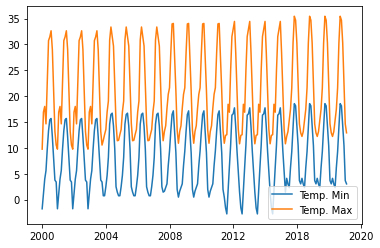

In [12]:
x=data_final["temp_min"].plot(label="Temp. Min", legend=True)
data_final["temp_max"].plot(label="Temp. Max", legend=True)
x.set_xticklabels(['1999', '2000', '2004', '2008', '2012', '2018', '2020'])

In [13]:
dict1=cn.indice_year(data_final['Year'])

In [14]:
data_final_2014 = data_final[:dict1[2015]].reset_index(drop=True)
data_final_2018 = data_final[dict1[2015]:dict1[2019]].reset_index(drop=True)
data_final_2019 = data_final[dict1[2019]:].reset_index(drop=True)

In [16]:
data_final_2018=cn.replace(data_final_2018, df_data_weather)

In [17]:
data_final=pd.concat([data_final_2014,data_final_2018,data_final_2019])
data_final=data_final.reset_index(drop=True)
data_final

,Year,Month,temp,temp_min,temp_max,pressure,humidity,wind_speed,Precip
0,2000,Ene,3.99,-1.77,9.76,956.07,NaN,1.31,0.78
1,2000,Feb,8.98,1.02,16.92,959.78,NaN,1.62,0.00
2,2000,Mar,10.98,3.95,18.02,953.67,NaN,2.34,1.03
3,2000,Abr,10.13,5.62,14.65,942.95,NaN,4.67,2.51
4,2000,May,16.16,9.80,22.51,948.54,NaN,1.52,1.57
5,2000,Jun,22.04,13.34,30.75,951.93,NaN,2.61,0.47
6,2000,Jul,23.46,15.45,31.47,948.01,NaN,3.58,0.39
7,2000,Ago,24.15,15.69,32.65,950.79,NaN,2.97,0.00
8,2000,Sep,20.58,12.14,29.02,949.34,NaN,2.76,0.37
9,2000,Oct,14.58,7.89,21.29,950.40,NaN,2.85,0.46


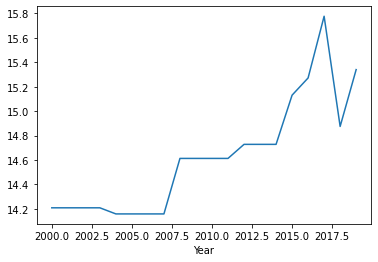

In [60]:
data_final.groupby('Year').temp.mean().plot()
# g
# g["temp"].plot()

In [53]:
g=data_final.groupby(['Year', 'Month']).mean()
g


temp  temp_min  temp_max  pressure  humidity  wind_speed  Precip
Year Month                                                                   
2000 Abr    10.13      5.62     14.65    942.95       NaN        4.67    2.51
     Ago    24.15     15.69     32.65    950.79       NaN        2.97    0.00
     Dic     6.98      3.41     10.55    948.31       NaN        2.73    3.63
     Ene     3.99     -1.77      9.76    956.07       NaN        1.31    0.78
     Feb     8.98      1.02     16.92    959.78       NaN        1.62    0.00
     Jul    23.46     15.45     31.47    948.01       NaN        3.58    0.39
     Jun    22.04     13.34     30.75    951.93       NaN        2.61    0.47
     Mar    10.98      3.95     18.02    953.67       NaN        2.34    1.03
     May    16.16      9.80     22.51    948.54       NaN        1.52    1.57
     Nov     8.48      3.78     13.20    948.02       NaN        3.64    2.13
     Oct    14.58      7.89     21.29    950.40       NaN        2.85    0.46
     Sep    20.58     12.14     29.02    949.34       NaN        2.76    0.37
2001 Abr    10.13      5.62     14.65    942.95       NaN        4.67    2.51
     Ago    24.15     15.69     32.65    950.79       NaN        2.97    0.00
     Dic     6.98      3.41     10.55    948.31       NaN        2.73    3.63
     Ene     3.99     -1.77      9.76    956.07       NaN        1.31    0.78
     Feb     8.98      1.02     16.92    959.78       NaN        1.62    0.00
     Jul    23.46     15.45     31.47    948.01       NaN        3.58    0.39
     Jun    22.04     13.34     30.75    951.93       NaN        2.61    0.47
     Mar    10.98      3.95     18.02    953.67       NaN        2.34    1.03
     May    16.16      9.80     22.51    948.54       NaN        1.52    1.57
     Nov     8.48      3.78     13.20    948.02       NaN        3.64    2.13
     Oct    14.58      7.89     21.29    950.40       NaN        2.85    0.46
     Sep    20.58     12.14     29.02    949.34       NaN        2.76    0.37
2002 Abr    10.13      5.62     14.65    942.95       NaN        4.67    2.51
     Ago    24.15     15.69     32.65    950.79       NaN        2.97    0.00
     Dic     6.98      3.41     10.55    948.31       NaN        2.73    3.63
     Ene     3.99     -1.77      9.76    956.07       NaN        1.31    0.78
     Feb     8.98      1.02     16.92    959.78       NaN        1.62    0.00
     Jul    23.46     15.45     31.47    948.01       NaN        3.58    0.39
     Jun    22.04     13.34     30.75    951.93       NaN        2.61    0.47
     Mar    10.98      3.95     18.02    953.67       NaN        2.34    1.03
     May    16.16      9.80     22.51    948.54       NaN        1.52    1.57
     Nov     8.48      3.78     13.20    948.02       NaN        3.64    2.13
     Oct    14.58      7.89     21.29    950.40       NaN        2.85    0.46
     Sep    20.58     12.14     29.02    949.34       NaN        2.76    0.37
2003 Abr    10.13      5.62     14.65    942.95       NaN        4.67    2.51
     Ago    24.15     15.69     32.65    950.79       NaN        2.97    0.00
     Dic     6.98      3.41     10.55    948.31       NaN        2.73    3.63
     Ene     3.99     -1.77      9.76    956.07       NaN        1.31    0.78
     Feb     8.98      1.02     16.92    959.78       NaN        1.62    0.00
     Jul    23.46     15.45     31.47    948.01       NaN        3.58    0.39
     Jun    22.04     13.34     30.75    951.93       NaN        2.61    0.47
     Mar    10.98      3.95     18.02    953.67       NaN        2.34    1.03
     May    16.16      9.80     22.51    948.54       NaN        1.52    1.57
     Nov     8.48      3.78     13.20    948.02       NaN        3.64    2.13
     Oct    14.58      7.89     21.29    950.40       NaN        2.85    0.46
     Sep    20.58     12.14     29.02    949.34       NaN        2.76    0.37
2004 Abr    10.82      4.69     16.95    946.52       NaN        3.16    1.24
     Ago    24.12     16.72     31.

In [ ]:
hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot
    - 'hexbin' : hexbin plot.



data_final["temp"].plot(kind='area').set_xticklabels(['1999', '2000', '2004', '2008', '2012', '2018', '2020'])


In [ ]:
data_final["temp_min"].plot(label="Temp. Min", legend=True).set_xticklabels(['1999', '2000', '2004', '2008', '2012', '2018', '2020'])
data_final["temp_max"].plot(label="Temp. Max", legend=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [ ]:
temp_hight=data_final.sort_values('temp', ascending=False)
temp_hight=temp_hight.head(20).reset_index(drop=True)

In [ ]:

x=temp_hight.temp.plot(label="Temp", legend=True)
temp_hight.Precip.plot(secondary_y=True, label="Precipitacion", legend=True)
x.set_xticklabels([])

In [ ]:
Precip_hight=data_final.sort_values('Precip', ascending=False)
Precip_hight=Precip_hight.head(40).reset_index(drop=True)

In [ ]:

x=Precip_hight.Precip.plot(label="Precipitacion", legend=True) 
Precip_hight.wind_speed.plot(secondary_y=True, label="velocidad del viento", legend=True)
x.set_xticklabels([])


In [ ]:
plt.suptitle(x, size=n)


In [ ]:
data_final

In [ ]:
sns.relplot(x="Mounth", y='temp', hue = 'Year',palette='colorblind', data=data_final)
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')